In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow.keras as keras

导入数据

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()

数据拆分

In [3]:
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


归一化

In [4]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1, 1)).reshape(-1,28,28)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

构建模型

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape= [28, 28]))
#批归一化可在激活函数前，也可在其之后
#激活函数selu具有批归一化功能
for _ in range(20):
    model.add(keras.layers.Dense(100, activation= "selu"))
model.add(keras.layers.AlphaDropout(rate= 0.5))
model.add(keras.layers.Dense(10, activation= "softmax"))
model.compile(optimizer= "adam", loss= "sparse_categorical_crossentropy", metrics= ["accuracy"])

训练模型

In [6]:
history = model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 24s 435us/sample - loss: 0.8388 - accuracy: 0.7199 - val_loss: 1.5542 - val_accuracy: 0.7276
Epoch 2/10
55000/55000 [==============================] - 15s 281us/sample - loss: 0.7020 - accuracy: 0.7619 - val_loss: 0.8628 - val_accuracy: 0.8002
Epoch 3/10
55000/55000 [==============================] - 15s 278us/sample - loss: 0.6728 - accuracy: 0.7756 - val_loss: 0.9120 - val_accuracy: 0.7650
Epoch 4/10
55000/55000 [==============================] - 12s 224us/sample - loss: 0.5912 - accuracy: 0.8103 - val_loss: 0.8380 - val_accuracy: 0.8180
Epoch 5/10
55000/55000 [==============================] - 16s 296us/sample - loss: 0.5830 - accuracy: 0.8137 - val_loss: 0.5792 - val_accuracy: 0.8464
Epoch 6/10
55000/55000 [==============================] - 19s 340us/sample - loss: 0.5501 - accuracy: 0.8218 - val_loss: 0.9836 - val_accuracy: 0.7462
Epoch 7/10
55000/55000 [=====================

显示训练过程

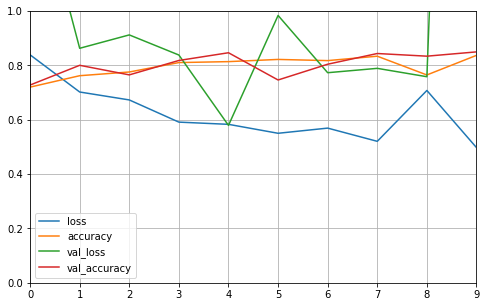

In [7]:
def plot_learnning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learnning_curves(history)

In [8]:
model.evaluate(x_test_scaled, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[10.068443631219864, 0.8418]